In [28]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [29]:
path_sf = rf'D:\OneDrive\Documentos\Materiais didáticos\MECAI\Dissertação\script\IBGE\BR_RG_Imediatas_2023\BR_RG_Imediatas_2023.shp'
geo_df = gpd.read_file(path_sf)
geo_df = geo_df.loc[geo_df['NM_UF'] == 'São Paulo']

In [30]:
dir_path = rf'D:\OneDrive\Documentos\Materiais didáticos\MECAI\Dissertação\script\Results'
name_path = 'results.csv'
complete_path = os.path.join(dir_path, name_path)

In [31]:
dir = rf'D:\OneDrive\Documentos\Materiais didáticos\MECAI\Dissertação\script\Dados Gerados Mestrado\Auxiliar'
df_dist_ZD_PA = pd.read_csv(os.path.join(dir, 'df_dist_ZD_PA.csv'))

In [32]:
def criar_excel(df, criar_novo=0, path=rf"C:\Users\rpafe\Desktop\dados_exportados.xlsx"):
    # Se criar_novo for 1 ou o arquivo não existir, cria um novo arquivo
    if criar_novo == 1 or not os.path.exists(path):
        mode = "w"
    else:
        mode = "a"

    with pd.ExcelWriter(path, mode=mode) as writer:
        # Obtendo o número da última sheet e incrementando (somente no modo 'a')
        if mode == "a":
            numsht = len(writer.book.sheetnames) + 1 if writer.book.sheetnames else 1
        else:
            numsht = 1  # Começa do primeiro se for um novo arquivo

        df.to_excel(writer, sheet_name=f"Sheet{numsht}")

    print(f"Arquivo Excel atualizado! {'Novo arquivo criado.' if criar_novo == 1 else 'Nova sheet adicionada.'}")


In [33]:
df = pd.read_csv(complete_path, encoding='latin1', sep=',')   

meses_dict = {
    0: '01-Jan', 1: '02-Fev', 2: '03-Mar', 3: '04-Abr', 
    4: '05-Mai', 5: '06-Jun', 6: '07-Jul', 7: '08-Ago', 
    8: '09-Set', 9: '10-Out', 10: '11-Nov', 11: '12-Dez'
}
df['Mes'] = df['Tempo'].apply(lambda x: meses_dict[x])

In [34]:
# df_fab = df.loc[df['Ref']=='Fabrica',:].groupby(['Ref', 'Origem', 'Mes', 'Abrv Var'])['Valor'].sum().unstack(level='Mes').\
#     applymap(lambda x: f"{x:,.0f}" if pd.notnull(x) else x)
# criar_excel(df_fab, criar_novo=1, path=rf"C:\Users\rpafe\Desktop\dados_exportados.xlsx")

# df_fab

In [35]:
df.loc[df['Ref'] == 'CD'].groupby(['Ref', 'uf_origem', 'uf_origem', 'cid_origem', 'Origem', 'Mes'])['z_w'].max().unstack(level='Mes')

,,,,Mes,01-Jan,02-Fev,03-Mar,04-Abr,05-Mai,06-Jun,07-Jul,08-Ago,09-Set,10-Out,11-Nov,12-Dez
Ref,uf_origem,uf_origem,cid_origem,Origem,,,,,,,,,,,,
CD,SP,SP,Osasco,CD_0006,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
df.loc[df['Ref'] == 'Fabrica', :].groupby(['Ref', 'Origem', 'Mes', 'Abrv Var'])['Valor'].sum().unstack(level='Mes').\
    applymap(lambda x: f"{x:,.0f}" if pd.notnull(x) else x)

C:\Users\rpafe\AppData\Local\Temp\ipykernel_10436\2141650626.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  applymap(lambda x: f"{x:,.0f}" if pd.notnull(x) else x)


Mes                      01-Jan  02-Fev  03-Mar  04-Abr  05-Mai  06-Jun  \
Ref     Origem Abrv Var                                                   
Fabrica F_0001 qac            0  11,700  11,700  11,700  11,700  11,700   
               qfra           0       0   9,101       0  63,697  11,700   
               qrf            0       0       0       0       0       0   
               sf        51,997  51,997  51,997  51,997  51,997  51,997   
               sfbc      25,999  14,299  11,700       0  51,997  51,997   
               sfrf      25,998  37,698  40,297  51,997       0       0   

Mes                      07-Jul  08-Ago  09-Set  10-Out  11-Nov  12-Dez  
Ref     Origem Abrv Var                                                  
Fabrica F_0001 qac       11,700  11,700  11,700  11,700  11,700  11,700  
               qfra      11,700  11,700  11,700  11,700  11,700       0  
               qrf            0       0       0       0       0       0  
               sf        51,997  51,997  51,997  51,997  51,997  51,997  
               sfbc      51,997  51,997  51,997  51,997  51,997  40,297  
               sfrf           0       0       0       0       0  11,700

In [37]:
df.loc[df['Ref'] == 'CD'].groupby(['Ref', 'Origem', 'uf_origem', 'cid_origem', 'Origem', 'Mes', 'Abrv Var'])['Valor'].sum().unstack(level='Mes').\
    applymap(lambda x: f"{x:,.0f}" if pd.notnull(x) else x)

C:\Users\rpafe\AppData\Local\Temp\ipykernel_10436\1038743238.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  applymap(lambda x: f"{x:,.0f}" if pd.notnull(x) else x)


Mes                                                 01-Jan   02-Fev   03-Mar  \
Ref Origem  uf_origem cid_origem Origem  Abrv Var                              
CD  CD_0006 SP        Osasco     CD_0006 qap             0   76,902  105,256   
                                         qrd             0        0    2,535   
                                         qrf             0   11,700   11,700   
                                         sc        297,373  355,019  381,777   
                                         scbp      136,499  173,670  174,298   
                                         scbt      102,374   94,184   94,184   
                                         scrd       19,500   32,955   43,874   
                                         scrf       39,000   54,210   69,419   

Mes                                                 04-Abr   05-Mai   06-Jun  \
Ref Origem  uf_origem cid_origem Origem  Abrv Var                              
CD  CD_0006 SP        Osasco     CD_0006 qap        77,220  134,549   79,913   
                                         qrd        57,329        0   26,910   
                                         qrf        11,700   11,700   11,700   
                                         sc        381,777  381,777  409,503   
                                         scbp      202,963  174,298  200,270   
                                         scbt       94,184   94,184   94,184   
                                         scrd            0   13,455        0   
                                         scrf       84,629   99,839  115,049   

Mes                                                 07-Jul   08-Ago   09-Set  \
Ref Origem  uf_origem cid_origem Origem  Abrv Var                              
CD  CD_0006 SP        Osasco     CD_0006 qap       109,664   85,696   71,804   
                                         qrd        12,185    9,522    7,978   
                                         qrf        11,700   11,700   11,700   
                                         sc        409,503  409,503  409,503   
                                         scbp      196,490  207,788  214,337   
                                         scbt       85,294   66,653   55,848   
                                         scrd            0        0        0   
                                         scrf      127,719  135,062  139,319   

Mes                                                 10-Out   11-Nov   12-Dez  
Ref Origem  uf_origem cid_origem Origem  Abrv Var                             
CD  CD_0006 SP        Osasco     CD_0006 qap        63,752   59,007   75,699  
                                         qrd         7,084    6,556        0  
                                         qrf        11,700   11,700   11,700  
                                         sc        409,503  409,503  333,804  
                                         scbp      218,132  220,410  202,305  
                                         scbt       49,585   45,894        0  
                                         scrd            0        0        0  
                                         scrf      141,786  143,199  131,499

In [38]:
df.loc[df['Ref'] == 'PA'].groupby(['Ref', 'uf_origem', 'Mes', 'Abrv Var'])['Valor'].sum().unstack(level='Mes').\
    applymap(lambda x: f"{x:,.0f}" if pd.notnull(x) else x)

C:\Users\rpafe\AppData\Local\Temp\ipykernel_10436\3704028293.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  applymap(lambda x: f"{x:,.0f}" if pd.notnull(x) else x)


Mes                        01-Jan     02-Fev     03-Mar     04-Abr     05-Mai  \
Ref uf_origem Abrv Var                                                          
PA  SP        qaj         100,279    125,692    126,384    102,907    105,896   
              qrc         146,249    134,549    134,549    134,549    134,549   
              qrp         113,086    108,915    109,500     89,159     91,755   
              sp        1,290,600  1,216,176  1,170,000  1,098,922  1,084,781   
              spbj        644,750    595,960    574,833    549,145    577,798   
              sprc        645,850    620,216    595,167    549,777    506,983   

Mes                        06-Jun   07-Jul   08-Ago   09-Set   10-Out  \
Ref uf_origem Abrv Var                                                  
PA  SP        qaj          98,994  103,367  110,738  111,204  105,130   
              qrc         134,549  121,849   95,218   79,783   70,836   
              qrp          85,773   89,555   95,954   96,342   91,090   
              sp        1,016,924  990,927  966,621  943,781  922,658   
              spbj        558,717  565,014  539,973  500,573  459,195   
              sprc        458,207  425,913  426,649  443,208  463,463   

Mes                      11-Nov   12-Dez  
Ref uf_origem Abrv Var                    
PA  SP        qaj       120,567  150,959  
              qrc        65,563        0  
              qrp       104,482   96,801  
              sp        900,016  921,557  
              spbj      397,635  322,375  
              sprc      502,381  599,182

In [39]:
df.loc[df['Ref'] == 'PA'].groupby(['Ref', 'Origem', 'uf_origem', 'cid_origem', 'Origem', 'Mes'])['z_w'].max().unstack(level='Mes')

Mes                                                 01-Jan  02-Fev  03-Mar  \
Ref Origem  uf_origem cid_origem           Origem                            
PA  PA_0001 SP        Adamantina           PA_0001     1.0    -0.0    -0.0   
    PA_0002 SP        Americana            PA_0002     1.0    -0.0    -0.0   
    PA_0004 SP        Andradina            PA_0004     1.0    -0.0    -0.0   
    PA_0005 SP        Araçatuba            PA_0005     1.0    -0.0    -0.0   
    PA_0006 SP        Araraquara           PA_0006     1.0    -0.0    -0.0   
...                                                    ...     ...     ...   
    PA_0108 SP        Tupã                 PA_0108     1.0    -0.0    -0.0   
    PA_0109 SP        Ubatuba              PA_0109     1.0    -0.0    -0.0   
    PA_0110 SP        Valentim Gentil      PA_0110     1.0    -0.0    -0.0   
    PA_0111 SP        Vargem Grande do Sul PA_0111     1.0    -0.0    -0.0   
    PA_0112 SP        Votuporanga          PA_0112     1.0    -0.0    -0.0   

Mes                                                 04-Abr  05-Mai  06-Jun  \
Ref Origem  uf_origem cid_origem           Origem                            
PA  PA_0001 SP        Adamantina           PA_0001    -0.0    -0.0    -0.0   
    PA_0002 SP        Americana            PA_0002     0.0    -0.0    -0.0   
    PA_0004 SP        Andradina            PA_0004    -0.0    -0.0    -0.0   
    PA_0005 SP        Araçatuba            PA_0005    -0.0    -0.0    -0.0   
    PA_0006 SP        Araraquara           PA_0006    -0.0    -0.0    -0.0   
...                                                    ...     ...     ...   
    PA_0108 SP        Tupã                 PA_0108    -0.0    -0.0    -0.0   
    PA_0109 SP        Ubatuba              PA_0109    -0.0    -0.0    -0.0   
    PA_0110 SP        Valentim Gentil      PA_0110    -0.0    -0.0    -0.0   
    PA_0111 SP        Vargem Grande do Sul PA_0111    -0.0    -0.0    -0.0   
    PA_0112 SP        Votuporanga          PA_0112    -0.0    -0.0    -0.0   

Mes                                                 07-Jul  08-Ago  09-Set  \
Ref Origem  uf_origem cid_origem           Origem                            
PA  PA_0001 SP        Adamantina           PA_0001    -0.0    -0.0    -0.0   
    PA_0002 SP        Americana            PA_0002    -0.0    -0.0    -0.0   
    PA_0004 SP        Andradina            PA_0004    -0.0    -0.0    -0.0   
    PA_0005 SP        Araçatuba            PA_0005    -0.0    -0.0    -0.0   
    PA_0006 SP        Araraquara           PA_0006    -0.0    -0.0    -0.0   
...                                                    ...     ...     ...   
    PA_0108 SP        Tupã                 PA_0108    -0.0    -0.0    -0.0   
    PA_0109 SP        Ubatuba              PA_0109    -0.0    -0.0    -0.0   
    PA_0110 SP        Valentim Gentil      PA_0110    -0.0    -0.0    -0.0   
    PA_0111 SP        Vargem Grande do Sul PA_0111    -0.0    -0.0    -0.0   
    PA_0112 SP        Votuporanga          PA_0112    -0.0    -0.0    -0.0   

Mes                                                 10-Out  11-Nov  12-Dez  
Ref Origem  uf_origem cid_origem           Origem                           
PA  PA_0001 SP        Adamantina           PA_0001    -0.0    -0.0    -0.0  
    PA_0002 SP        Americana            PA_0002    -0.0    -0.0    -0.0  
    PA_0004 SP        Andradina            PA_0004    -0.0    -0.0    -0.0  
    PA_0005 SP        Araçatuba            PA_0005    -0.0    -0.0    -0.0  
    PA_0006 SP        Araraquara           PA_0006    -0.0    -0.0    -0.0  
...                                                    ...     ...     ...  
    PA_0108 SP        Tupã                 PA_0108    -0.0    -0.0    -0.0  
    PA_0109 SP        Ubatuba              PA_0109    -0.0    -0.0    -0.0  
    PA_0110 SP        Valentim Gentil      PA_0110    -0.0    -0.0    -0.0  
    PA_0111 SP        Vargem Grande do Sul PA_0111    -0.0    -0.0    -0.0  
    PA_0112 SP        Votuporan

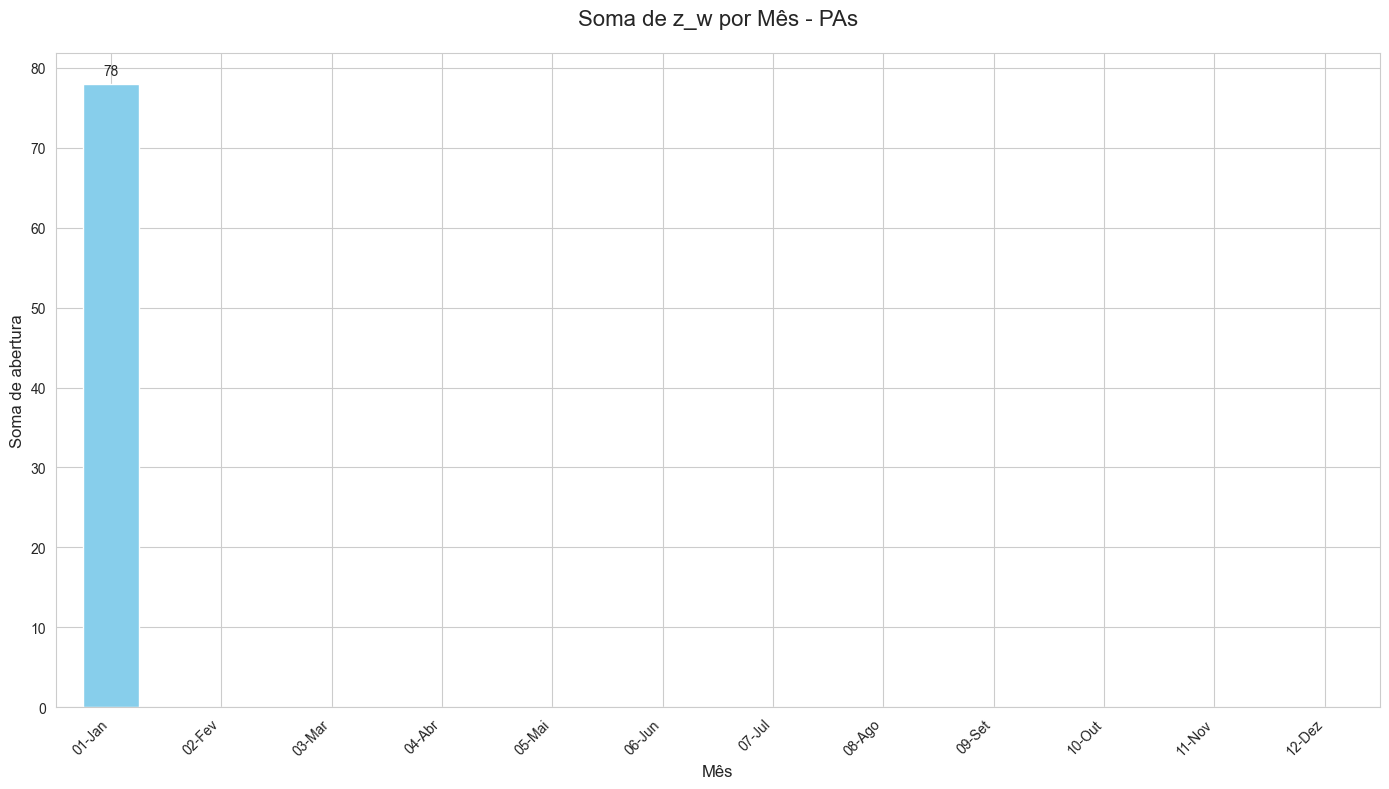

In [40]:
df_pa = df.loc[df['Ref'] == 'PA']

# Agrupar por mês ('Mes') e calcular a soma da coluna 'z_w' para cada mês
monthly_data = df_pa[['Mes', 'Origem', 'z_w']].drop_duplicates().groupby(['Mes'])['z_w'].sum()

# Supondo que 'df' seja o seu DataFrame carregado

df_pa = df.loc[df['Ref'] == 'PA']

# Agrupar por mês ('Mes') e calcular a soma da coluna 'z_w' para cada mês
monthly_data = df_pa[['Mes', 'Origem', 'z_w']].drop_duplicates().groupby(['Mes'])['z_w'].sum()

# Criar a figura e os eixos do gráfico
plt.figure(figsize=(14, 8))
sns.set_style("whitegrid")

# Plotar o gráfico de barras
ax = monthly_data.plot(kind='bar', color='skyblue')

# Adicionar rótulos de dados
for p in ax.patches:
    if p.get_height() > 0:
        # Adiciona o rótulo acima da barra
        ax.annotate(f'{p.get_height():.0f}',  # Formata o valor (opcional: .2f para 2 casas decimais)
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),  # Deslocamento vertical do texto (ajuste conforme necessário)
                textcoords='offset points')

# Definir o título do gráfico, rótulos dos eixos e outras configurações
plt.title('Soma de z_w por Mês - PAs', fontsize=16, pad=20)
plt.xlabel('Mês', fontsize=12)
plt.ylabel('Soma de abertura', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()

# Exibir o gráfico
plt.show()

In [41]:
df_plot = df.loc[df['Ref']!='Fabrica', ['Ref', 'Origem', 'lat_origem', 'lon_origem', 'uf_origem', 'cid_origem', 'z_w']].drop_duplicates()
df_plot = df_plot.reset_index(drop=True)
df_cidades = pd.read_csv(rf'D:\OneDrive\Documentos\Materiais didáticos\MECAI\Dissertação\script\Dados Gerados Mestrado\Auxiliar\df_cluster_pa_cities.csv',\
                          encoding='utf-8', sep=',', )
df_cidades = df_cidades.loc[~df_cidades['nome_cidade'].isin(df_plot['cid_origem'].unique()), :].drop_duplicates().reset_index(drop=True)
df_cidades = df_cidades.rename(columns={'nome_cidade': 'cid_origem', 'latitude_cidade': 'lat_origem', 'longitude_cidade': 'lon_origem'})

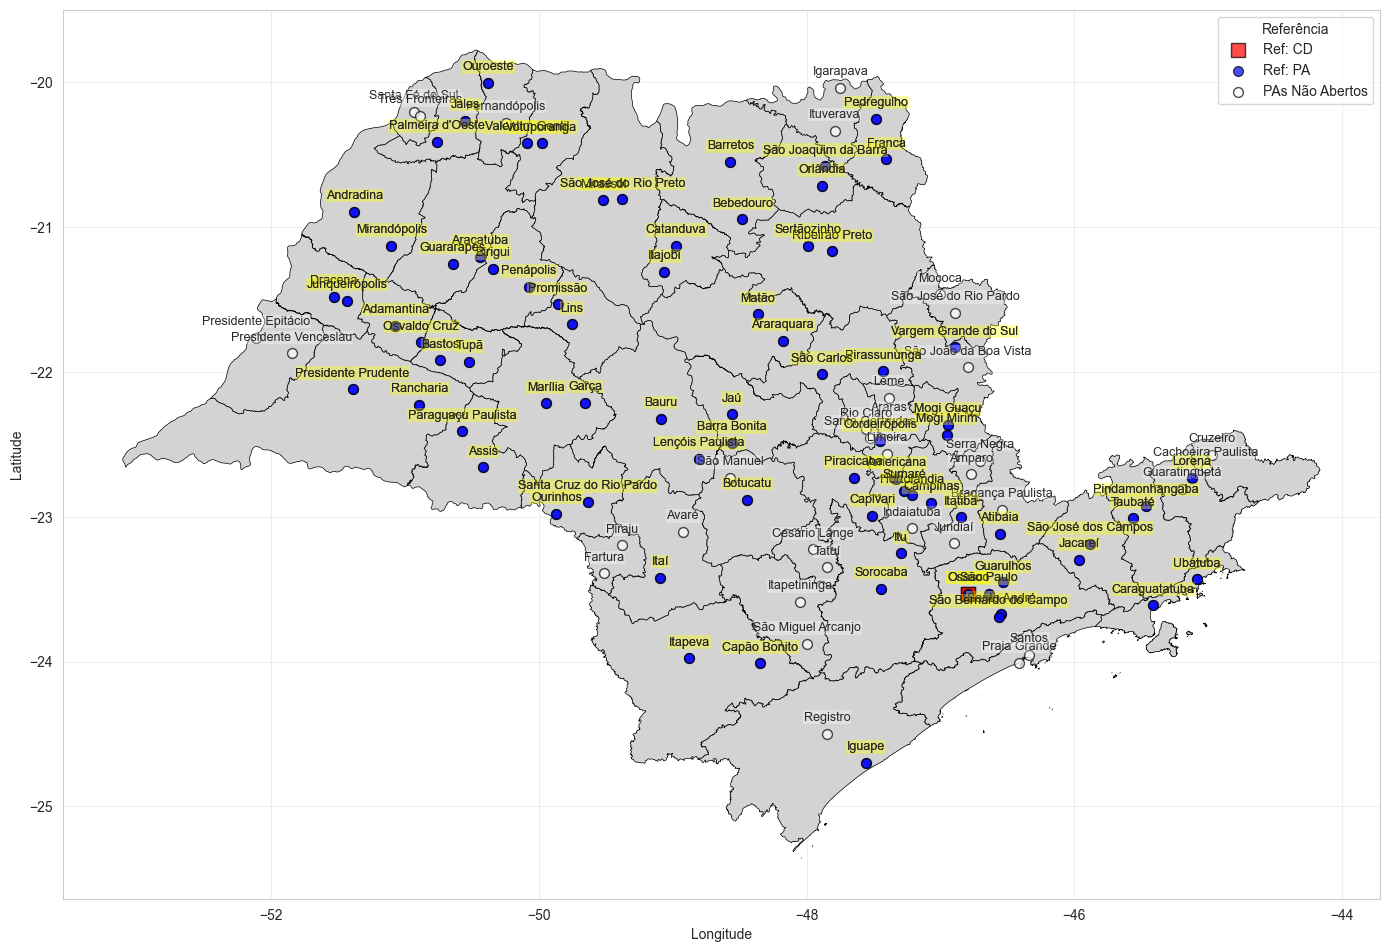

In [42]:
import matplotlib.pyplot as plt

def plotar_grafico(df, df_cidades):
    # Configurações de estilo
    ref_config = {
        'CD': {'color': 'red', 'marker': 's', 'size': 100, 'label_color': 'yellow'},
        'PA': {'color': 'blue', 'marker': 'o', 'size': 50, 'label_color': 'yellow'},
        # Padrão para Refs não especificadas
        'default': {'color': 'gray', 'marker': 'o', 'size': 50, 'label_color': 'yellow'}
    }
    
    # Criar figura
    fig, ax = plt.subplots(figsize=(14, 12))
    geo_df.plot(ax=ax, color='lightgray', edgecolor='black', linewidth=0.5)
    
    # Lista para armazenar handles da legenda
    legend_handles = []
    
    def plot_group(data, is_city=False):
        for ref, group in data.groupby('Ref' if not is_city else 'cid_origem'):
            config = ref_config.get(ref, ref_config['default']) if not is_city else {
                'color': 'white',
                'marker': 'o',
                'size': 50,
                'label_color': 'white'
            }
            
            # Criar scatter plot com label para legenda
            if not is_city:
                scatter = plt.scatter(
                    group['lon_origem'], 
                    group['lat_origem'],
                    c=config['color'],
                    marker=config['marker'],
                    s=config['size'],
                    edgecolor='black',
                    label=f'Ref: {ref}',
                    alpha=0.7
                )
                legend_handles.append(scatter)
            else:
                plt.scatter(
                    group['lon_origem'], 
                    group['lat_origem'],
                    c=config['color'],
                    marker=config['marker'],
                    s=config['size'],
                    edgecolor='black',
                    alpha=0.7
                )
            
            # Adicionar labels de texto
            for _, row in group.iterrows():
                plt.text(
                    row['lon_origem'],
                    row['lat_origem'] + 0.09,
                    row['cid_origem'],
                    fontsize=9,
                    ha='center',
                    bbox=dict(
                        facecolor=config['label_color'],
                        alpha=0.3 if is_city else 0.2,
                        edgecolor='none',
                        pad=0.5
                    )
                )
    
    # Plotar grupos
    plot_group(df_cidades, is_city=True)
    plot_group(df)
    
    # Adicionar entrada para cidades na legenda
    city_scatter = plt.scatter([], [], c='white', marker='o', s=50, 
                              edgecolor='black', label='PAs Não Abertos', alpha=0.7)
    legend_handles.append(city_scatter)
    
    # Configurações finais
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    # plt.title('CDs, PAs e PAs Não Abertos - Localização por Origem', fontsize=16, pad=20)
    
    # Criar legenda com os handles coletados
    plt.legend(handles=legend_handles, title='Referência', loc='best')
    
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# Chamada da função
plotar_grafico(df_plot, df_cidades)

In [43]:
print(sorted(list(df_cidades.loc[~df_cidades['cid_origem'].isin(df_plot['cid_origem'].unique()), 'cid_origem'].unique())))

['Amparo', 'Araras', 'Avaré', 'Bragança Paulista', 'Cachoeira Paulista', 'Cesário Lange', 'Cruzeiro', 'Fartura', 'Fernandópolis', 'Guaratinguetá', 'Igarapava', 'Indaiatuba', 'Itapetininga', 'Ituverava', 'Jundiaí', 'Leme', 'Limeira', 'Mococa', 'Piraju', 'Praia Grande', 'Presidente Epitácio', 'Presidente Venceslau', 'Registro', 'Rio Claro', 'Santa Fé do Sul', 'Santa Gertrudes', 'Santos', 'Serra Negra', 'São José do Rio Pardo', 'São João da Boa Vista', 'São Manuel', 'São Miguel Arcanjo', 'Tatuí', 'Três Fronteiras']


In [44]:
print(sorted(list(df_plot['cid_origem'].unique())))

['Adamantina', 'Americana', 'Andradina', 'Araraquara', 'Araçatuba', 'Assis', 'Atibaia', 'Barra Bonita', 'Barretos', 'Bastos', 'Bauru', 'Bebedouro', 'Birigui', 'Botucatu', 'Campinas', 'Capivari', 'Capão Bonito', 'Caraguatatuba', 'Catanduva', 'Cordeirópolis', 'Dracena', 'Franca', 'Garça', 'Guararapes', 'Guarulhos', 'Hortolândia', 'Iguape', 'Itajobi', 'Itapeva', 'Itatiba', 'Itaí', 'Itu', 'Jacareí', 'Jales', 'Jaú', 'Junqueirópolis', 'Lençóis Paulista', 'Lins', 'Lorena', 'Marília', 'Matão', 'Mirandópolis', 'Mirassol', 'Mogi Guaçu', 'Mogi Mirim', 'Orlândia', 'Osasco', 'Osvaldo Cruz', 'Ourinhos', 'Ouroeste', "Palmeira d'Oeste", 'Paraguaçu Paulista', 'Pedregulho', 'Penápolis', 'Pindamonhangaba', 'Piracicaba', 'Pirassununga', 'Presidente Prudente', 'Promissão', 'Rancharia', 'Ribeirão Preto', 'Santa Cruz do Rio Pardo', 'Santo André', 'Sertãozinho', 'Sorocaba', 'Sumaré', 'São Bernardo do Campo', 'São Carlos', 'São Joaquim da Barra', 'São José do Rio Preto', 'São José dos Campos', 'São Paulo', 'Ta

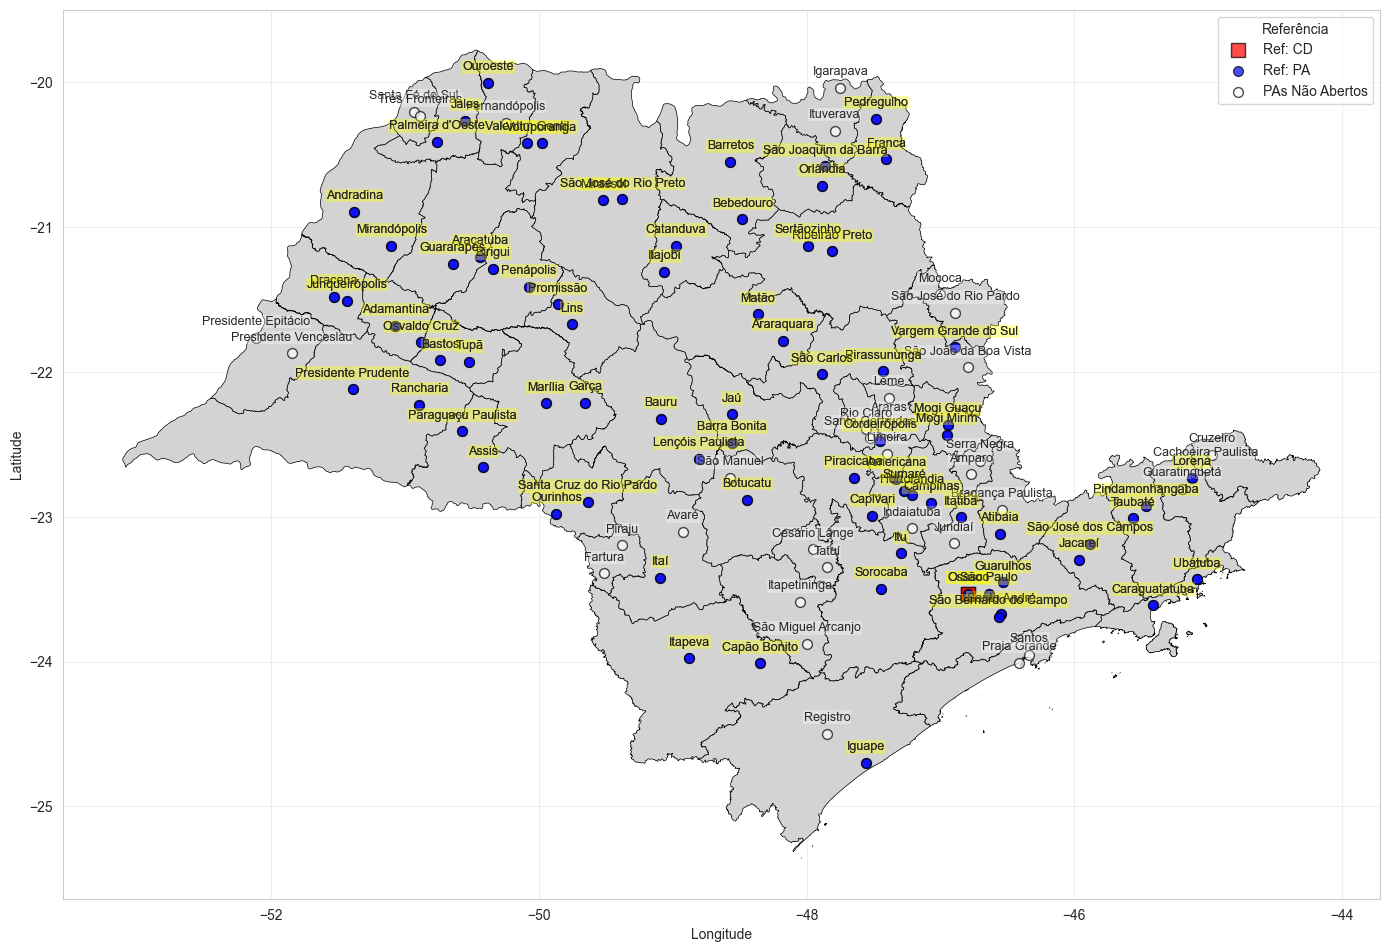

In [45]:
plotar_grafico(df_plot, df_cidades)

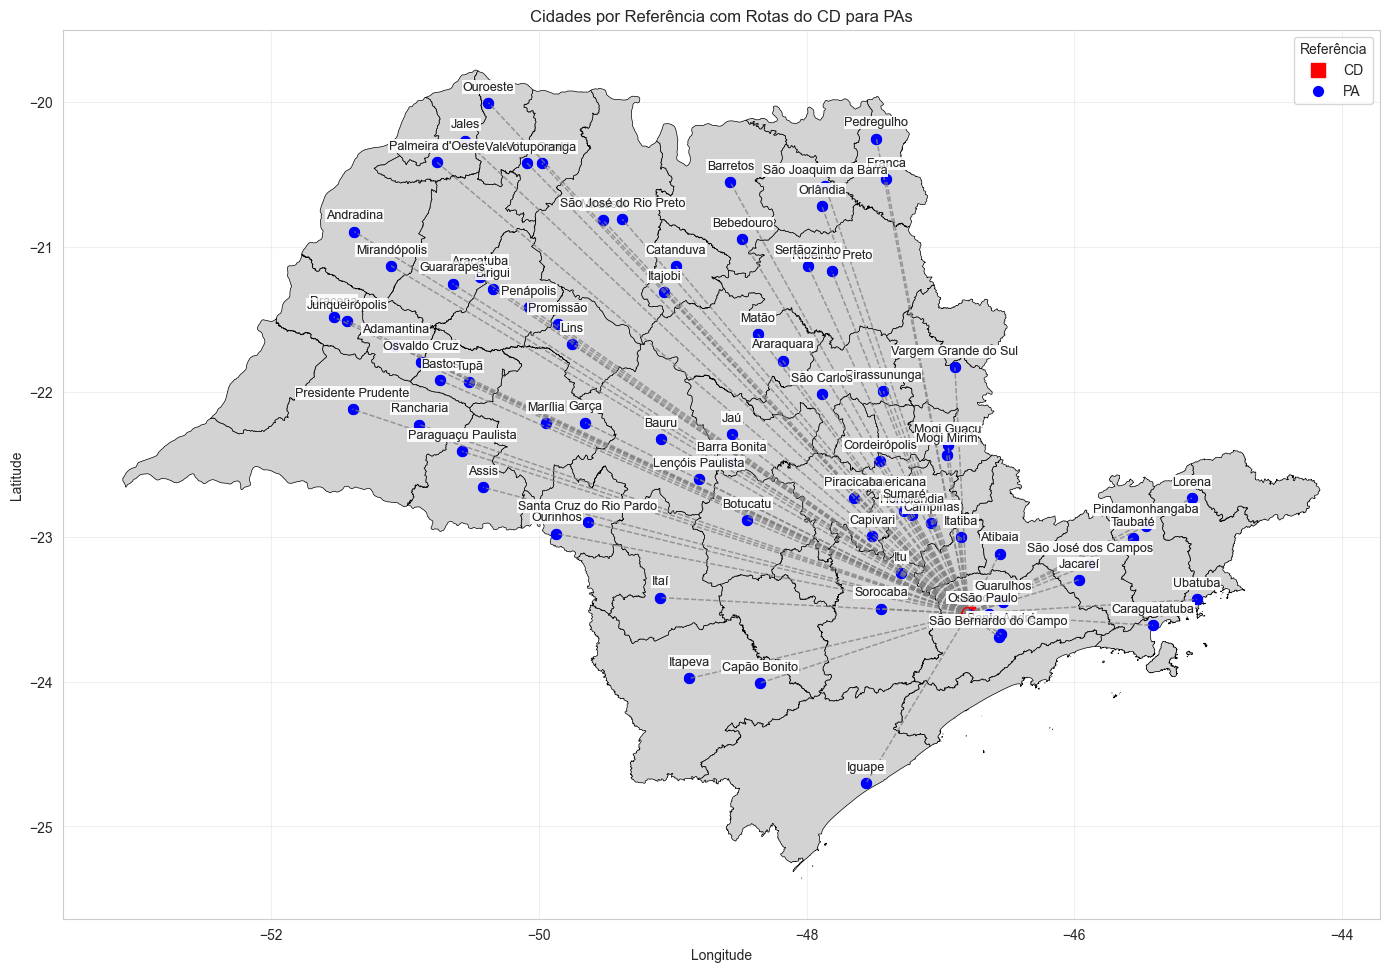

In [46]:
def plotar_grafico_traço(df):
    # Dicionário de cores para cada Ref
    ref_cores = {
        'CD': 'red',
        'PA': 'blue',
        # Adicione outras Refs e cores conforme necessário
    }
    
    # Dicionário de marcadores para cada Ref
    ref_markers = {
        'CD': 's',  # quadrado
        'PA': 'o',  # círculo
        # Adicione outros marcadores conforme necessário
    }

    ref_size = {
        'CD': 100,
        'PA': 50,
        # Adicione outros tamanhos conforme necessário
    }
    
    fig, ax = plt.subplots(figsize=(14, 12))
    geo_df.plot(ax=ax, color='lightgray', edgecolor='black', linewidth=0.5)
    
    # Encontrar as coordenadas do CD
    cd_data = df[df['Ref'] == 'CD']
    if not cd_data.empty:
        cd_lon = cd_data['lon_origem'].iloc[0]
        cd_lat = cd_data['lat_origem'].iloc[0]
    
    # Plotar cada grupo separadamente
    for ref, group in df.groupby('Ref'):
        scatter = plt.scatter(
            group['lon_origem'], 
            group['lat_origem'],
            c=ref_cores.get(ref, 'gray'),
            marker=ref_markers.get(ref, 'o'),
            s=ref_size.get(ref, 50),
            label=ref
        )
        
        # Adicionar rótulos das cidades
        for _, row in group.iterrows():
            plt.text(
                row['lon_origem'], 
                row['lat_origem'] + 0.09,  # Ajuste vertical para evitar sobreposição
                row['cid_origem'],          # Nome da cidade
                fontsize=9,                 # Tamanho da fonte
                ha='center',                 # Alinhamento horizontal
                bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', pad=0.5)
            )
            
            # Desenhar linhas do CD para os PAs
            if ref == 'PA' and not cd_data.empty:
                plt.plot(
                    [cd_lon, row['lon_origem']],
                    [cd_lat, row['lat_origem']],
                    color='gray',
                    linestyle='--',
                    linewidth=1,
                    alpha=0.5
                )
    
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('Cidades por Referência com Rotas do CD para PAs')
    plt.legend(title='Referência')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

plotar_grafico_traço(df_plot)

In [47]:
df_info_zd = df_dist_ZD_PA.iloc[:,1:5].rename(columns={'latitude_cidade': 'lat_zd', 'longitude_cidade': 'lon_zd'})
df_teste = df.loc[(df['Origem'].str.startswith('PA')) & (df['Destino'].str.startswith('ZD')) &
                (df['b_rota']==1), ['Origem', 'Destino', 'lat_origem', 'lon_origem']].drop_duplicates().reset_index(drop=True)
df_teste = pd.merge(df_teste, df_info_zd, left_on='Destino', right_on='ZD', how='left')

In [48]:
df_teste = pd.merge(df_teste, df_plot.loc[:, ['Origem', 'cid_origem']], left_on='Origem', right_on='Origem', how='left')

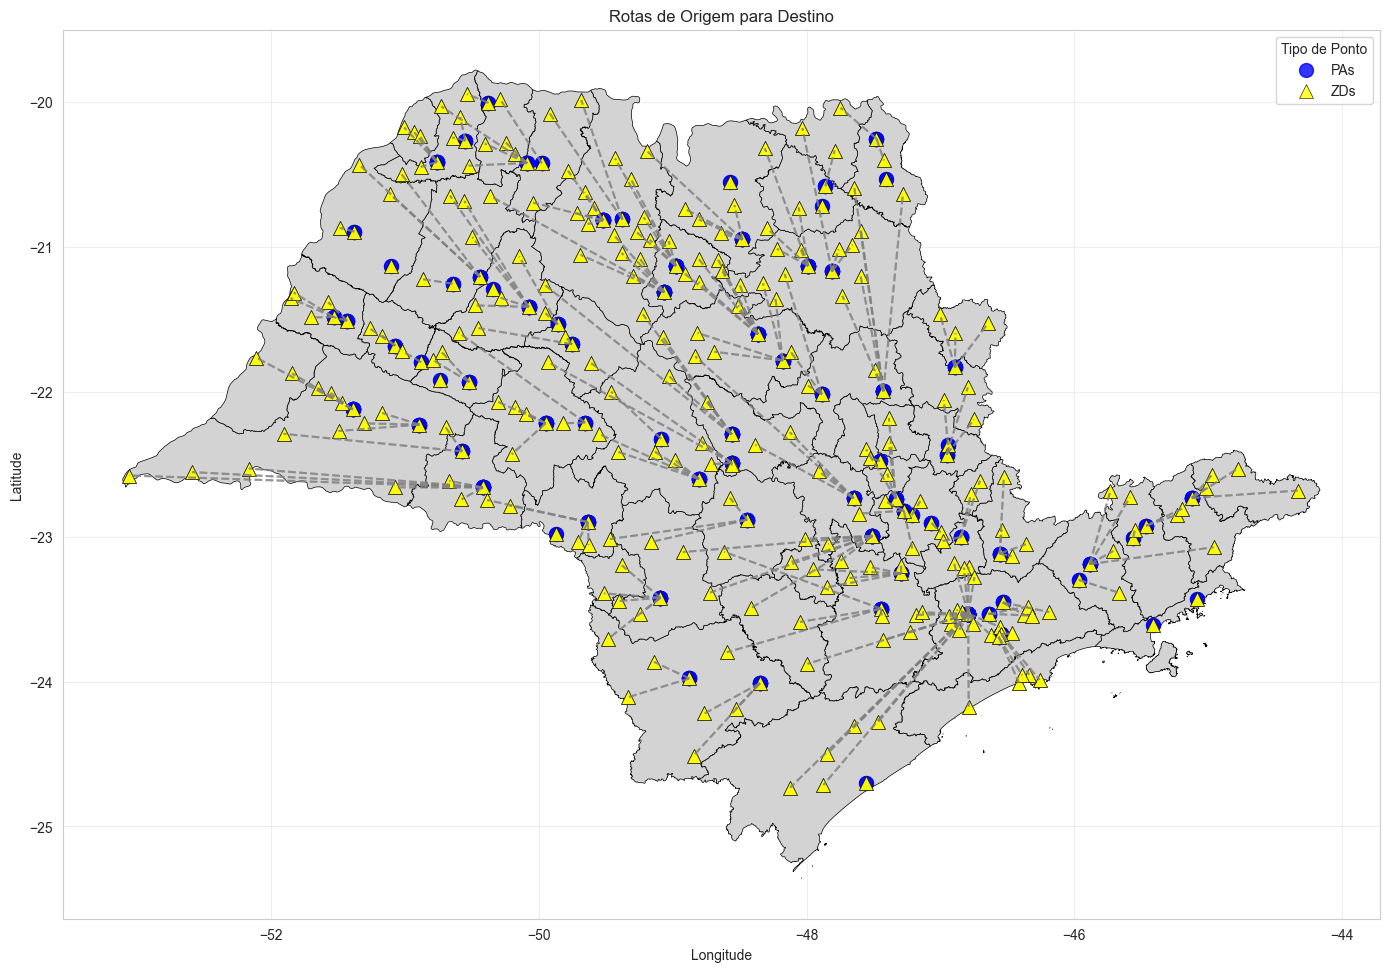

In [49]:
def plotar_grafico_traço(df):
    fig, ax = plt.subplots(figsize=(14, 12))
    geo_df.plot(ax=ax, color='lightgray', edgecolor='black', linewidth=0.5)
    
    # Plotar pontos de Origem (círculo azul)
    scatter_origem = plt.scatter(
        df['lon_origem'], 
        df['lat_origem'],
        c='blue',
        marker='o',
        s=100,
        label="PAs",
        alpha=0.8
    )
    
    # Plotar pontos de Destino (triângulo amarelo)
    scatter_destino = plt.scatter(
        df['lon_zd'], 
        df['lat_zd'],
        c='yellow',
        marker='^',
        s=100,
        label='ZDs',
        alpha=0.8,
        edgecolors='black',
        linewidth=0.5
    )
    
    # # Adicionar rótulos das origens (Origem + nome_cidade)
    # for _, row in df.iterrows():
    #     plt.text(
    #         row['lon_origem'], 
    #         row['lat_origem'] + 0.09,
    #         f"{row['Origem']}", # f"{row['Origem']} - {row['nome_cidade']}",
    #         fontsize=9,
    #         ha='center',
    #         bbox=dict(facecolor='lightblue', alpha=0.7, edgecolor='none', pad=0.5)
    #     )
    
    # # Adicionar rótulos dos destinos (Destino + cid_origem)
    # for _, row in df.iterrows():
    #     plt.text(
    #         row['lon_zd'], 
    #         row['lat_zd'] + 0.09,
    #         f"{row['Destino']}", # f"{row['Destino']} - {row['cid_origem']}"
    #         fontsize=9,
    #         ha='center',
    #         bbox=dict(facecolor='lightyellow', alpha=0.7, edgecolor='none', pad=0.5)
    #     )
    
    # Desenhar linhas tracejadas de origem para destino
    for _, row in df.iterrows():
        plt.plot(
            [row['lon_origem'], row['lon_zd']],
            [row['lat_origem'], row['lat_zd']],
            color='gray',
            linestyle='--',
            linewidth=1.5,
            alpha=0.6
        )
    
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('Rotas de Origem para Destino')
    plt.legend(title='Tipo de Ponto')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# Chamada da função
plotar_grafico_traço(df_teste)

In [50]:
df.loc[(df['Ref'] == 'PA') &
       (df['Abrv Var'] == 'qaj')].groupby(['Ref', 'Origem', 'uf_origem', 'cid_origem', 'Abrv Var'])['Valor'].sum().sort_values(ascending=False)

Ref  Origem   uf_origem  cid_origem             Abrv Var
PA   PA_0100  SP         São Paulo              qaj         398457.0
     PA_0065  SP         Osasco                 qaj         156559.0
     PA_0089  SP         Santo André            qaj          65703.0
     PA_0035  SP         Guarulhos              qaj          59072.0
     PA_0091  SP         São Bernardo do Campo  qaj          52700.0
                                                              ...   
     PA_0038  SP         Iguape                 qaj           1344.0
     PA_0028  SP         Dracena                qaj           1220.0
     PA_0059  SP         Mirandópolis           qaj           1004.0
     PA_0013  SP         Bastos                 qaj            760.0
     PA_0068  SP         Ouroeste               qaj            469.0
Name: Valor, Length: 78, dtype: float64

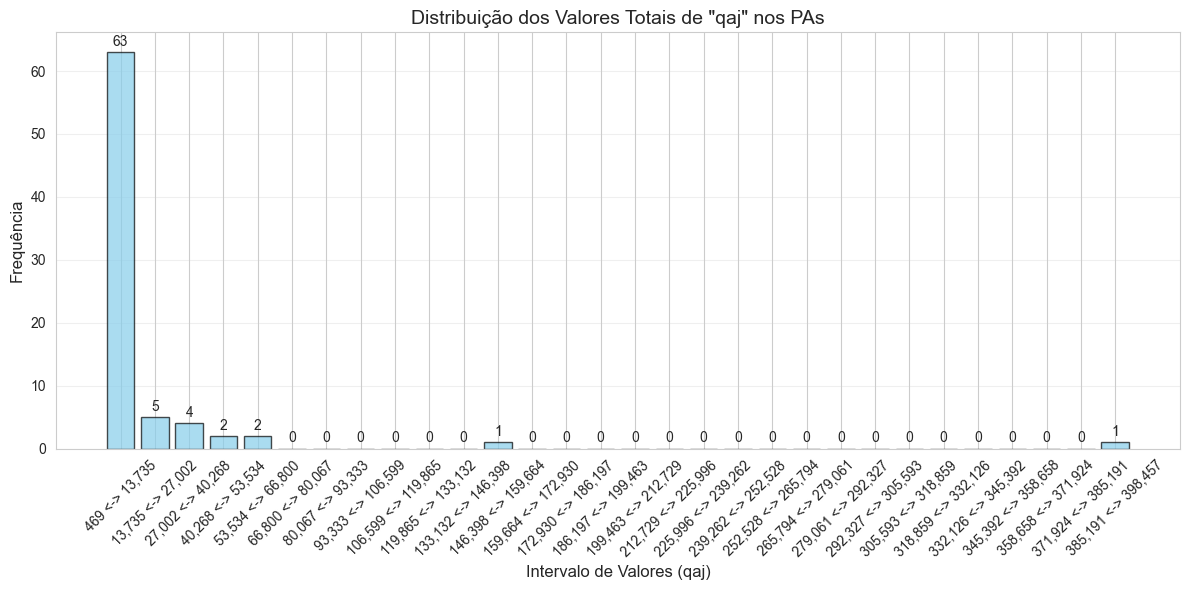

In [51]:
# Filtrar e preparar os dados (como antes)
dados_pa_qaj = df.loc[
    (df['Ref'] == 'PA') & 
    (df['Abrv Var'] == 'qaj')
].groupby(['Ref', 'Origem', 'uf_origem', 'cid_origem', 'Abrv Var'])['Valor'].sum().sort_values(ascending=False)

df_hist = dados_pa_qaj.reset_index()

# Criar bins (intervalos) manualmente para controle
valores = df_hist['Valor']
bins = 30  # Número de barras
hist, bin_edges = np.histogram(valores, bins=bins)

# Definir posições das barras com espaçamento
largura_barra = (bin_edges[1] - bin_edges[0]) * 0.8  # 80% da largura original
posicoes = bin_edges[:-1] + (bin_edges[1] - bin_edges[0]) * 0.1  # Centralizar + espaço

# Plotar as barras
plt.figure(figsize=(12, 6))
barras = plt.bar(
    posicoes, 
    hist, 
    width=largura_barra, 
    color='skyblue', 
    edgecolor='black',
    alpha=0.7
)

# Adicionar rótulos em cada barra
for barra, valor in zip(barras, hist):
    altura = barra.get_height()
    plt.text(
        barra.get_x() + barra.get_width() / 2,  # Posição X (centro da barra)
        altura + 0.5,                            # Posição Y (acima da barra)
        f'{int(valor)}',                         # Texto (valor)
        ha='center',                             # Alinhamento horizontal
        va='bottom',                             # Alinhamento vertical
        fontsize=10
    )

# Ajustar eixos e título
plt.xlabel('Intervalo de Valores (qaj)', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.title('Distribuição dos Valores Totais de "qaj" nos PAs', fontsize=14)
plt.xticks(posicoes, [f'{bin_edges[i]:,.0f} <-> {bin_edges[i+1]:,.0f}' for i in range(bins)], rotation=45)
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

In [52]:
df.loc[(df['Ref'] == 'CD') & (df['Destino'] == 'PA_0056')].groupby(['Ref', 'Origem', 'uf_origem', 'cid_origem', 'Origem', 'Mes', 'Abrv Var'])['Valor'].\
    sum().unstack(level='Mes').applymap(lambda x: f"{x:,.0f}" if pd.notnull(x) else x)

C:\Users\rpafe\AppData\Local\Temp\ipykernel_10436\1107061188.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  sum().unstack(level='Mes').applymap(lambda x: f"{x:,.0f}" if pd.notnull(x) else x)


,,,,,Mes,01-Jan,02-Fev,03-Mar,04-Abr,05-Mai,06-Jun,07-Jul,08-Ago,09-Set,10-Out,11-Nov,12-Dez
Ref,Origem,uf_origem,cid_origem,Origem,Abrv Var,,,,,,,,,,,,
CD,CD_0006,SP,Osasco,CD_0006,qap,0,837,986,144,114,705,538,"1,064",944,577,0,514


In [53]:
df.loc[df['Origem'] == 'PA_0066'].groupby(['Ref', 'Origem', 'uf_origem', 'cid_origem', 'Mes', 'Abrv Var'])['Valor'].sum().unstack(level='Mes').\
    applymap(lambda x: f"{x:,.0f}" if pd.notnull(x) else x)

C:\Users\rpafe\AppData\Local\Temp\ipykernel_10436\3642971027.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  applymap(lambda x: f"{x:,.0f}" if pd.notnull(x) else x)


Mes                                         01-Jan 02-Fev 03-Mar 04-Abr  \
Ref Origem  uf_origem cid_origem   Abrv Var                               
PA  PA_0066 SP        Osvaldo Cruz qaj         116    127    151    162   
                                   qrc           0      0      0    451   
                                   qrp         131    110    131    140   
                                   sp        1,375  1,358  1,338  1,450   
                                   spbj        675    548    397    820   
                                   sprc        700    810    941    630   

Mes                                         05-Mai 06-Jun 07-Jul 08-Ago  \
Ref Origem  uf_origem cid_origem   Abrv Var                               
PA  PA_0066 SP        Osvaldo Cruz qaj          62    116     88     85   
                                   qrc           0      0      0      0   
                                   qrp          54    101     76     74   
                                   sp        1,442  1,427  1,415  1,404   
                                   spbj        758    642    554    469   
                                   sprc        684    785    861    935   

Mes                                         09-Set 10-Out 11-Nov 12-Dez  
Ref Origem  uf_origem cid_origem   Abrv Var                              
PA  PA_0066 SP        Osvaldo Cruz qaj         184    190     58    330  
                                   qrc         406      0      0      0  
                                   qrp         158    164     50    212  
                                   sp        1,450  1,424  1,416  1,450  
                                   spbj        764    574    516    338  
                                   sprc        686    850    900  1,112

In [54]:
df.loc[df['Origem'] == 'PA_0032'].groupby(['Ref', 'Origem', 'uf_origem', 'cid_origem', 'Mes', 'Abrv Var'])['Valor'].sum().unstack(level='Mes').\
    applymap(lambda x: f"{x:,.0f}" if pd.notnull(x) else x)

C:\Users\rpafe\AppData\Local\Temp\ipykernel_10436\1091802412.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  applymap(lambda x: f"{x:,.0f}" if pd.notnull(x) else x)


Mes                                       01-Jan 02-Fev 03-Mar 04-Abr 05-Mai  \
Ref Origem  uf_origem cid_origem Abrv Var                                      
PA  PA_0032 SP        Garça      qaj         128    138    236    156    164   
                                 qrc           0      0      0      0      0   
                                 qrp         146    119    205    135    142   
                                 sp        3,500  3,481  3,600  3,579  3,557   
                                 spbj      1,750  1,612  1,526  1,370  1,206   
                                 sprc      1,750  1,869  2,074  2,209  2,351   

Mes                                       06-Jun 07-Jul 08-Ago 09-Set 10-Out  \
Ref Origem  uf_origem cid_origem Abrv Var                                      
PA  PA_0032 SP        Garça      qaj         231    174    195    165    203   
                                 qrc         196    620      0      0      0   
                                 qrp         201    150    169    143    177   
                                 sp        3,600  2,956  2,930  3,600  3,574   
                                 spbj      1,244  1,070    875  1,402  1,199   
                                 sprc      2,356  1,886  2,055  2,198  2,375   

Mes                                       11-Nov 12-Dez  
Ref Origem  uf_origem cid_origem Abrv Var                
PA  PA_0032 SP        Garça      qaj         224    244  
                                 qrc           0      0  
                                 qrp         194    156  
                                 sp        3,544  3,600  
                                 spbj        975    875  
                                 sprc      2,569  2,725